# 1

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

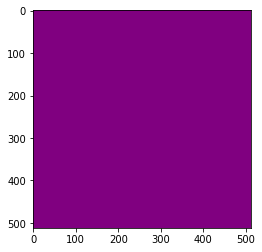

In [2]:
#6.5)
rgb_im = np.zeros((512,512,3), 'uint8')
r = 0.5
g = 1
b = 0.5

rgb_im[..., 0] = r*256 # R
rgb_im[..., 1] = g*256 # G
rgb_im[..., 2] = b*256 # B

plt.imshow(rgb_im)

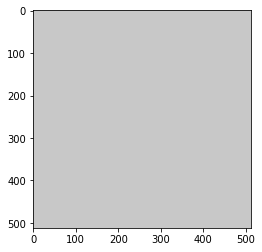

In [3]:
# 6.7)
rgb_im = np.zeros((512,512,3), 'uint8')
r = 1
g = 1
b = 1

rgb_im[..., 0] = r*200 # R
rgb_im[..., 1] = g*200 # G
rgb_im[..., 2] = b*200 # B

plt.imshow(rgb_im)

# 2 a

/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


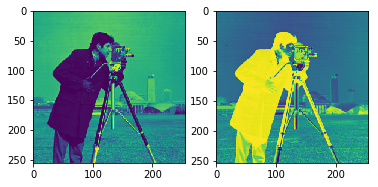

In [4]:
im = misc.imread('../data/cameraman.tiff')

def negative_img(img):
    neg_img = []
    for i in range(1, img.shape[0] - 1):
        neg_img_row = []
        for j in range(1, img.shape[1] - 1):
            neg_img_row.append(255 - img[i][j])
        neg_img.append(neg_img_row)
    return np.array(neg_img)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(im)
axarr[1].imshow(negative_img(im))

# 2 b

In [5]:
def error_diffusion(im, t):
    for i in range(0, im.shape[0] - 1):
        for j in range(0, im.shape[1] - 1):
            old_pixel = im[i][j]
            im[i][j] = 255 if im[i][j] > t else 0
            error = old_pixel - im[i][j]
            im[i][j + 1] = im[i][j + 1] + (3 * error) // 8
            im[i + 1][j + 1] = im[i + 1][j + 1] + error // 4
            im[i + 1][j] = im[i + 1][j] + (3 * error) // 8
    return im

In [6]:
img = misc.imread('../data/cameraman.tiff')
im_ed1 = error_diffusion(img, 155)
im_ed2 = error_diffusion(im_ed1, 155)

/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/zeev/.virtualenvs/science/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


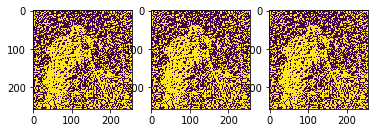

In [7]:
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(img)
axarr[1].imshow(im_ed1)
axarr[2].imshow(im_ed2)

# 3

In [88]:
# 6.28)

def spec(N):                                             
    t = np.linspace(-510, 510, N)                                              
    return np.round(np.clip(np.stack([-t, 510-np.abs(t), t], axis=1), 0, 255)).astype(np.uint8)

z = spec(255)
a = np.zeros((255, 3))

D = np.sqrt((z[:,0]-a[:,0])**2 + (z[:,1]-a[:,1])**2 + (z[:,2]-a[:,2])**2)

c = [[8,0,0], [0,1,0], [0,0,1]]
c_inverse = np.linalg.inv(c)

D0 = D * c_inverse
D0

ValueError: operands could not be broadcast together with shapes (255,) (3,3) 